In [1]:
import numpy as np
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt

In [2]:
map_size = 50

In [3]:
my_map = np.empty((map_size, map_size), dtype=np.int8)
map_bmp = np.array(Image.open(f'{map_size}x{map_size}_mapC.bmp'))

# initalize with all holes
my_map[:] = 0

# only True cells are frozen
my_map[map_bmp] = 1


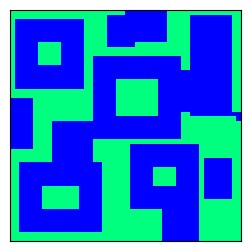

In [4]:
# Visualize the final qtable
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 3))
# cmap = matplotlib.colormaps['winter']
cmap = "winter"
normalizer = matplotlib.colors.Normalize(vmin=0, vmax=1)
im = matplotlib.cm.ScalarMappable(norm=normalizer, cmap=cmap)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
im = ax.imshow(my_map,
               cmap=cmap,
               norm=normalizer)

In [5]:
X = my_map.reshape(-1,1)
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

In [10]:
print(f"U - {U.shape}, S - {S.shape}, VT - {VT.shape}")

U - (2500, 1), S - (1, 1), VT - (1, 1)


In [7]:
# plt.figure(1)
# plt.semilogy(np.diag(S))
# # plt.plot(np.diag(S))

# plt.title('Singular Values')
# plt.show()

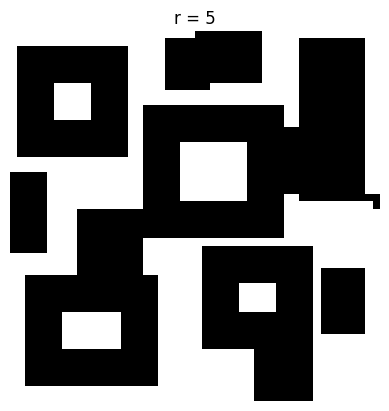

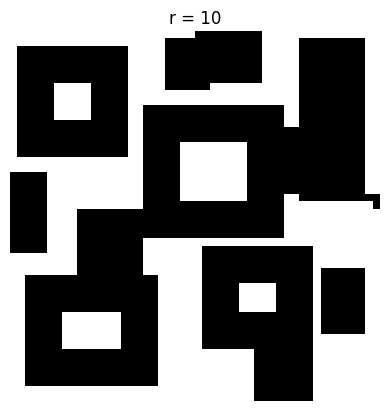

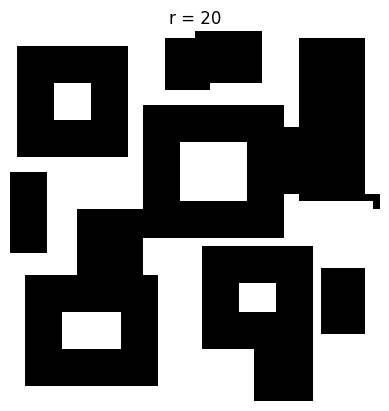

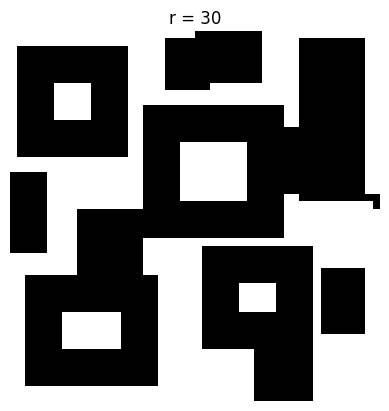

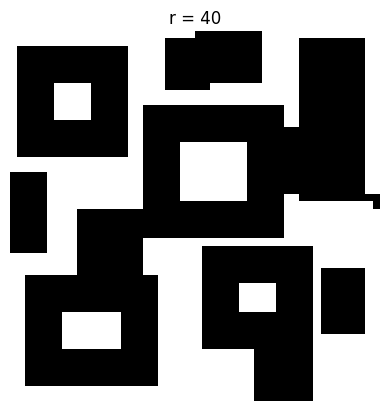

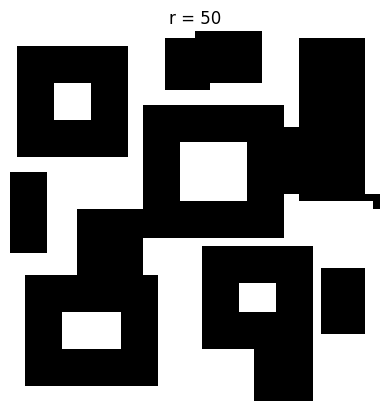

In [8]:
j = 0
for r in (5, 10, 20, 30, 40, 50):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox.reshape(map_size, map_size))
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()